In [2]:
import numpy as np

# Introducción a la Inferencia Bayesiana

### Objetivo
Aprender los conceptos fundamentales de inferencia bayesiana, cómo aplicar el teorema de Bayes en problemas reales.

## 1. Inferencia Bayesiana

La inferencia bayesiana es un enfoque probabilístico que nos permite actualizar nuestras creencias a la luz de nueva evidencia. Se fundamenta en el **Teorema de Bayes**, que relaciona probabilidades condicionales. Específicamente, para dos eventos $A$ y $B$, con $P(B)\neq 0$, el teorema afirma que:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Donde:
- $ P(A|B) $ es la probabilidad de que el evento $ A $ ocurra dado que $ B $ es cierto.
- $ P(B|A) $ es la probabilidad de que el evento $ B $ ocurra dado que $ A $ es cierto.
- $ P(A) $ y $ P(B) $ son las probabilidades de los eventos $ A $ y $ B $ independientemente uno del otro.


### ¿Por qué usar Bayes?
A diferencia del enfoque frecuentista, el enfoque Bayesiano permite:
- Incorporar conocimiento o creencias previas en forma de probabilidades $P(H)$.
- Trabajar "mejor" con muestras pequeñas.
- Actualizar probabilidades de eventos en función de los datos observados. 

### Ejemplo
Supongamos que un médico quiere determinar la probabilidad de que un paciente tenga una enfermedad rara ($H$) basado en el resultado positivo de una prueba ($E$).

**Datos iniciales:**
- $P(H)$: Probabilidad inicial de la enfermedad ($0.01$).
- $P(E|H)$: Sensibilidad de la prueba ($0.95$).
- $P(E| \neg H)$: Tasa de falsos positivos ($0.1$).

Calculamos $P(H|E)$ (Probabilidad de la enfermadad dado un resultado positivo de la prueba) con el teorema de Bayes:
$$
P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}
$$


Recordar, por **probabilidad total** que: 
$$
P(E) = P(E|H)P(H) + P(E|\neg H)P(\neg H)
$$

**Sencibilidad** de una prueba: qué tan beuna es la prueba para detectar un caso positivo   (Recall)

**Especificidad** qué tan buena es una prueba para detectar un caso negativo = 1 - tasa_falsos_positivos

In [7]:
# Ejemplo básico del teorema de Bayes
'''
**Datos iniciales:**
- $P(H)$: Probabilidad inicial de la enfermedad ($0.01$).
- $P(E|H)$: Sensibilidad de la prueba ($0.95$).
- $P(E| \neg H)$: Tasa de falsos positivos ($0.1$).
'''
P_H = 0.01  # Probabilidad de la enfermedad
P_E_given_H = 0.95  # Sensibilidad de la prueba
P_E_given_not_H = 0.1  # Tasa de falsos positivos

# Cálculo de la probabilidad de la evidencia
P_E = (P_E_given_H * P_H) + (P_E_given_not_H * (1 - P_H))

# Cálculo de la probabilidad posterior
posterior = (P_E_given_H * P_H) / P_E

print(f"Probabilidad posterior (P(H|E)): {posterior:.4f}, ")


Probabilidad posterior (P(H|E)): 0.0876


Para una **hipótesis $H$** y **una evidencia $E$**, el **Teorema de Bayes** se expresa como:

$$
P(H | E) = \frac{P(E | H) P(H)}{P(E)}
$$

donde:
1. **Probabilidad posterior:** $P(H | E)$, es la probabilidad de la hipótesis $H$ dada la evidencia $E$.   
   
2. **Verosimilitud (Likelihood):**   $ P(E | H) $, es la probabilidad de observar la evidencia $E$ si la hipótesis $H$ es cierta.    
 
3. **Probabilidad a priori:**   $P(H)$, la probabilidad de la hipótesis **antes** de observar la evidencia.    

4. **Probabilidad marginal de la evidencia:**  
  $$ P(E) = P(E | H) P(H) + P(E | \neg H) P(\neg H) $$  

  se obtiene considerando todas las formas en que $E$ puede ocurrir.

In [37]:
# Definir probabilidades
P_H = 0.01  
P_not_H = 1 - P_H  
P_E_given_H = 0.95  
P_E_given_not_H = 0.02  

# Cálculo de P(E)
P_E = (P_E_given_H * P_H) + (P_E_given_not_H * P_not_H)

# Aplicar Teorema de Bayes
P_H_given_E = (P_E_given_H * P_H) / P_E

# Mostrar resultado
print(f"La probabilidad de tener COVID-19 dado un resultado positivo es: {P_H_given_E:.4f} (o {P_H_given_E*100:.2f}%)")

La probabilidad de tener COVID-19 dado un resultado positivo es: 0.3242 (o 32.42%)


## **Ejercicio 1: Detección de Dopaje en Atletas**

Un test antidopaje tiene las siguientes características:

- **Sensibilidad:** 99% (probabilidad de dar positivo si el atleta está dopado).
- **Especificidad:** 95% (probabilidad de dar negativo si el atleta no está dopado).
- **Prevalencia de dopaje:** 0.5% (probabilidad previa de que un atleta esté dopado).

## **Planteamiento**

Queremos calcular la probabilidad de que un atleta realmente esté dopado ($H$) si el test da positivo ($E$). Es decir, buscamos:

$$
P(H | E) = \frac{P(E | H) P(H)}{P(E)}
$$

Donde:

- $P(H)$ es la prevalencia del dopaje en atletas.
- $ P(\neg H) = 1 - P(H) $ es la probabilidad de que un atleta **no** esté dopado.
- $ P(E | H) $ es la **sensibilidad**, la probabilidad de un test positivo dado que el atleta está dopado.
- $ P(E | \neg H) = 1 - \text{especificidad} $ es la probabilidad de un **falso positivo**.
- $ P(E) $ es la probabilidad de obtener un resultado positivo en general.

#### **Definimos Probabilidades**

Dado que:

$
P(H) = 0.005, \quad P(\neg H) = 0.995
$

$
P(E | H) = 0.99, \quad P(E | \neg H) = 1 - 0.95 = 0.05
$

#### **Calculamos $P(E)$**

$
P(E) = P(E | H) P(H) + P(E | \neg H) P(\neg H)
$

Sustituyendo los valores:

$
P(E) = (0.99 \times 0.005) + (0.05 \times 0.995)
$

$
P(E) = 0.00495 + 0.04975 = 0.0547
$

#### **Calculamos $P(H | E)$ (Probabilidad de dopaje dado un positivo)**

$$
P(H | E) = \frac{P(E | H) P(H)}{P(E)}
$$

Sustituyendo:

$$
P(H | E) = \frac{0.00495}{0.0547} \approx 0.0905
$$

## **Por lo tanto:**

Si un atleta **da positivo** en el test, la probabilidad de que realmente esté dopado es **9.05%**.

Este resultado ilustra un fenómeno clave en la estadística médica y forense: **incluso con un test muy preciso, cuando la prevalencia de la condición es baja, una gran parte de los positivos pueden ser falsos positivos**.  
Es por ello que **las pruebas de dopaje deben confirmarse con otras pruebas adicionales antes de tomar decisiones definitivas**.


In [38]:
# Definir parámetros del test antidopaje
P_E_given_H= 0.95  # P(E | H) - Sensibilidad
P_E_given_not_H = 0.02  # P(¬E | ¬H) - Especificidad
P_H = 0.005  # P(H) - Prevalencia de dopaje

# Función para calcular la probabilidad posterior
P_E = (P_E_given_H * P_H) + (P_E_given_not_H * P_not_H)

# Calcular la probabilidad de dopaje dado un test positivo
P_H_given_E = (P_E_given_H * P_H) / P_E

# Imprimir resultado
print(f"La probabilidad de que un atleta esté realmente dopado dado un test positivo es: {P_H_given_E:.4f} ({P_H_given_E * 100:.2f}%)")


La probabilidad de que un atleta esté realmente dopado dado un test positivo es: 0.1935 (19.35%)


**Definamos una función para hacer más eficiente el cálculo y pasarle diferentes valores de los argumentos:**

In [39]:
def calc_posterior(P_H, P_E_given_H, P_E_given_not_H):
    """
    Calcula la probabilidad posterior usando el teorema de Bayes.
    
    :param P_H: Probabilidad inicial de la hipótesis (enfermedad).
    :param P_E_given_H: Probabilidad de la evidencia dado que la hipótesis es cierta.
    :param P_E_given_not_H: Probabilidad de la evidencia dado que la hipótesis es falsa.
    :return: Probabilidad posterior.
    """
    P_not_H = 1 - P_H
    P_E = (P_E_given_H * P_H) + (P_E_given_not_H * P_not_H)
    posterior = (P_E_given_H * P_H) / P_E
    print(f"La probabilidad de ser positivo dado un test positivo es: {posterior:.4f} ({posterior * 100:.2f}%)")

    return posterior


## **Ejercicio 2:Tomar Café y su relación con desarrollar Cáncer** y por qué es importante entender el contexto

Un estudio afirma que 85 % de las personas **con cáncer** beben café de forma regular.

Asimismo, se estima que de toda la población, un 0.5% es diagnosticada con cáncer, mientras que un 65% de la población bebe café de manera regular. De este modo:

$
P(cafe\mid cancer) = 0.85
$

$
P(cancer) = 0.005
$

$
P(cafe) = 0.65
$



1. **Interpreta** en palabras qué significa $P(cafe\mid cancer)=0.85$.  
2. ¿Podemos decir que $P(cancer\mid cafe)=0.85$?
3. ¿Qué conclusión preliminar sacas sobre la relación “café → cáncer” basándote solo en $P(cafe\mid cancer)$?
4. ¿Podemos decir que el café representa un problema (en relación a tener cáncer)?


Notemos que sólo el 0.5% de la población tiene cáncer. Sin embargo, 65% bebe café de forma regular. Si el café contribuye a tener cáncer, *deberíamos* tener un porcentaje más alto de cancer.

Sin el contexto y/o interpretación adecuada, si sólo leemos : "Nuevo estudio revela que el 85% de pacientes con cáncer toman café", es probable confundirse y pensar que puede haber una relación importante entre ambos fenómenos.

La **dirección del condicionamiento IMPORTA**, ya que no es lo mismo la **probabilidad de tener cancer DADO que se bebe café** que la **probabilidad de beber café DADO que se tiene cáncer**. En este caso, la probabilidad más relevante (para relacionar cáncer con el consumo de café) es la primera. Así:

$$
P(cancer\mid cafe) = \frac{P(cafe\mid cancer)\cdot P(cancer)}{P(cafe)}
$$

In [40]:
#Calculemos P(cáncer|café):
# acá es más directo, porque nos dan la prior, la sensibilidad y la marginal de la evidencia.
P_cancer = 0.005  # Probabilidad de tener cáncer
P_cafe = 0.65  # Probabilidad de tomar café
P_cafe_given_cancer = 0.85  # Probabilidad de tomar café dado que se tiene cáncer

# Aplicando el teorema de Bayes
P_cancer_given_cafe = (P_cafe_given_cancer * P_cancer) / P_cafe
print(f"La probabilidad de tener cáncer dado que se toma café es: {P_cancer_given_cafe:.4f} ({P_cancer_given_cafe * 100:.2f}%)")
print(f"{P_cancer_given_cafe/P_cancer} es el factor de aumento de la probabilidad de tener cáncer al tomar café.")

La probabilidad de tener cáncer dado que se toma café es: 0.0065 (0.65%)
1.3076923076923077 es el factor de aumento de la probabilidad de tener cáncer al tomar café.


### **Comentario:**
En estos ejercicios, el Teorema de Bayes nos permite calcular la probabilidad condicional de un evento dado un resultado positivo en un test o detector. Aunque la sensibilidad y especificidad del test son altas, la baja prevalencia de la condición hace que la probabilidad de un verdadero positivo sea relativamente baja. Esto subraya la importancia de considerar tanto la precisión del test como la prevalencia de la condición en la población al interpretar los resultados.

# Visualización del Teorema de Bayes

La siguiente gráfica representa los tres componentes del Teorema de Bayes:

1. **Prior $P(H)$**: Representa nuestra creencia inicial antes de observar la evidencia.
2. **Verosimilitud $P(E|H)$**: Representa cómo los datos afectan la hipótesis.
3. **Posterior $P(H|E)$**: Es la probabilidad actualizada de la hipótesis después de considerar la evidencia.




/tmp/ipykernel_59376/1092353128.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(likelihood * prior, H_values)


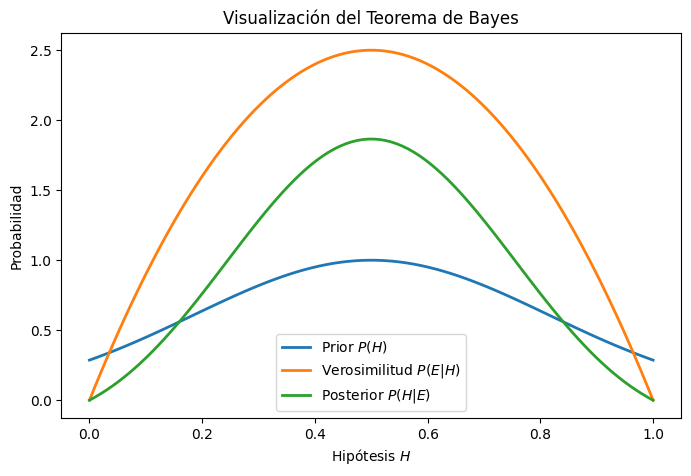

In [41]:
import matplotlib.pyplot as plt

# Definimos valores de hipótesis (H) en un rango de 0 a 1
H_values = np.linspace(0, 1, 100)

# Definimos Prior (P(H)) - Creencia inicial
prior = np.exp(-5 * (H_values - 0.5) ** 2)  # Distribución gaussiana centrada en 0.5, y varianza 1/10

# Definimos Verosimilitud (P(E|H)) - Cómo los datos afectan la hipótesis.
likelihood = H_values * (1 - H_values) * 10  # Función arbitraria en forma de U invertida

# Calcular la Evidencia (P(E)) normalizando la distribución
evidence = np.trapz(likelihood * prior, H_values)

# Calcular Posterior usando el Teorema de Bayes
posterior = (likelihood * prior) / evidence

# Graficar:
plt.figure(figsize=(8, 5))

plt.plot(H_values, prior, label="Prior $P(H)$", linewidth=2)
plt.plot(H_values, likelihood, label="Verosimilitud $P(E|H)$", linewidth=2)
plt.plot(H_values, posterior, label="Posterior $P(H|E)$", linewidth=2)

plt.xlabel("Hipótesis $H$")
plt.ylabel("Probabilidad")
plt.title("Visualización del Teorema de Bayes")
plt.legend()
plt.show()

La gráfica muestra cómo se actualiza la probabilidad de una hipótesis después de observar evidencia utilizando el **Teorema de Bayes**.

### **1. Prior $P(H)$**
Representa nuestra creencia inicial antes de observar la evidencia.  
En la gráfica:
- Es la **línea azul**.
- Se ha modelado como una distribución gaussiana centrada en **0.5**.
- Indica que inicialmente creemos que valores de $H$ cercanos a 0.5 son más probables.

Puede representarse como una distribución normal:

$$
P(H) = e^{-5(H - 0.5)^2}
$$

donde la media es 0.5 y la varianza controla la dispersión de la creencia inicial.

### **2. Verosimilitud $P(E|H)$**
Representa cómo la evidencia afecta cada posible hipótesis.  

- Es la **línea naranja**.
- Modelada con una función en forma de "U invertida".
- Indica que la evidencia favorece valores intermedios de $H$ más que valores extremos.

Matemáticamente, podemos expresarla como:

$$
P(E|H) = H(1 - H) \cdot 10
$$

Esta función indica que la evidencia tiene mayor probabilidad en valores intermedios de $H$.

### **3. Evidencia $P(E)$**
Es la probabilidad total de observar los datos.  
Se calcula sumando (integrando en el caso contínuo) todas las posibles combinaciones de hipótesis y evidencia:

$$
P(E) = \int P(E|H) P(H) dH
$$

Este valor actúa como un factor de normalización para asegurar que la distribución posterior sea una distribución de probabilidad válida.

En código, podemos calcularlo como:

```python
evidence = np.trapz(likelihood * prior, H_values)


### **4. Posterior $P(H|E)$**  

La **Posterior** es la probabilidad actualizada de la hipótesis después de observar la evidencia (**línea verde**).  
 
- Resulta de multiplicar el **Prior** por la **Verosimilitud**, y normalizar con la **Evidencia**.  
- Nos muestra cómo cambió nuestra creencia en la hipótesis después de ver la evidencia.  

Se calcula aplicando el **Teo. de Bayes**:

$$
P(H|E) = \frac{P(E|H) P(H)}{P(E)}
$$


## **Interpretación de la Gráfica**  

- **Si la Prior es "fuerte" -** (muy concentrado en un valor), la evidencia necesita ser muy convincente para cambiarlo.  
- **Si la Verosimilitud favorece valores específicos**, la distribución posterior se desplazará en esa dirección.  

Esta representación nos ayuda a comprender **cómo la información previa y la nueva evidencia interactúan** para actualizar nuestra creencia en una hipótesis.  


In [ ]:
https://github.com/axscsouza/curso_causalidad

In [36]:
from math import comb

In [42]:
10000000*0.0001

1000.0

## Caso: Inferencia Bayesiana Aplicada a las Elecciones Venezolanas

### Contexto
En las elecciones de junio de 2024, los resultados redondeados al porcentaje más cercano coincidieron exactamente con los votos reportados. Esto generó sospechas sobre manipulación.

**Hipótesis:**
- $H_0$: Los resultados fueron precisos.
- $H_1$: Los resultados fueron manipulados.

**Cálculo bajo $H_0$:**
Supongamos que los porcentajes reales son distribuidos uniformemente. Calculamos la probabilidad de que los totales coincidan exactamente.



## 1. Objetivo
Aplicar el marco bayesiano para analizar la anomalía numérica observada en los resultados de las elecciones presidenciales de Venezuela en 2024.
La explicación se basa en el análisis presentado por **Terence Tao** en su artículo ["What are the odds, II: the Venezuelan presidential election"](https://terrytao.wordpress.com/2024/08/02/what-are-the-odds-ii-the-venezuelan-presidential-election/)


### Marco Bayesiano
El Teorema de Bayes nos permite actualizar probabilidades ante nueva evidencia:
$$
\frac{{P(H_1|E)}}{{P(H_0|E)}} = \frac{{P(E|H_1)}}{{P(E|H_0)}} \cdot \frac{{P(H_1)}}{{P(H_0)}}
$$

### Hipótesis
1. **Hipótesis nula ($H_0$):** Los resultados reportados son correctos.
2. **Hipótesis alternativa ($H_1$):** Los resultados fueron manipulados.

### Evento Observado ($E$)
Los votos reportados coinciden exactamente con los porcentajes redondeados al 0.1%:
- Maduro: 51.2% -> 5,150,092 votos.
- González: 44.2% -> 4,445,978 votos.
- Otros: 4.6% -> 462,704 votos.

El total es exactamente igual al número total de votantes, 10,058,774.



## 2. Análisis

### 2.1. Probabilidad bajo $H_0$
Supongamos que las proporciones de votos se distribuyen uniformemente en un margen de error razonable ($\varepsilon$). Entonces:
$$
\mathbb{P}(E|H_0) \approx \left(\frac{{1000}}{{N}}\right)^2 \approx 10^{-8}
$$
donde $N = 10,058,774$.

Es decir, **la probabilidad de observar esto dado que los resultados NO fueron manipulados es de 1 en 100 millones**

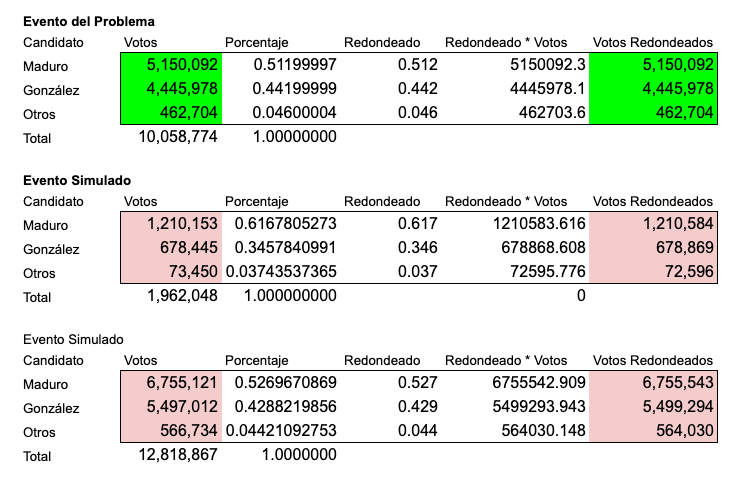

In [ ]:
# Parámetros del problema
total_votantes = 10058774  # Total de votantes
prob_H0 = (1000 / total_votantes) ** 2
print(f"Probabilidad de E bajo H0: {prob_H0:.10e}")


### Haremos una simulación que nos permita entender dimensionar el problema

In [ ]:
# Parámetros
total_votantes = 10058774
simulaciones = 100_000_000  # 100 millones de simulaciones
batch_size = 1_000_000  # Procesar en lotes de 1 millón para evitar uso excesivo de memoria

# Función para verificar coincidencia (vectorizada)
def verificar_coincidencia(votos):
    porcentajes = votos / total_votantes
    porcentajes_redondeados = np.round(porcentajes, 3)  # Redondear al decimal 3
    votos_reconstruidos = np.round(porcentajes_redondeados * total_votantes).astype(int)
    return np.all(votos == votos_reconstruidos, axis=1) 
    #axis = 1 -> para un renglón DADO, ¿coinciden las columnas de ambos arreglos?
    #regresa un arreglo booleano, en el cual si hay un True, este True viene en la posición del renglón donde se da la coincidencia

# Simulación
exitos = 0
casos_exitosos = []  # Lista para guardar los casos exitosos

# Procesar en lotes para evitar uso excesivo de memoria


# Resultados
print(f"En {simulaciones} simulaciones, los votos coincidieron exactamente {exitos} veces.")
print(f"La probabilidad observada es {exitos / simulaciones:.8f} (esperada: 0.00000001).")

# Mostrar los casos exitosos
if exitos > 0:
    print("\nCasos exitosos:")
    for caso in casos_exitosos:
        print(caso)
else:
    print("\nNo hubo casos exitosos.")

# **Análisis de Manipulación Electoral con Probabilidad Condicional y la Regla en Cadena**

Este análisis se basa en el artículo de **Terence Tao** sobre la elección presidencial venezolana de 2024, donde se investiga la probabilidad de que los resultados electorales hayan sido **manipulados**, dados los patrones numéricos inusuales en los totales reportados.

## **Planteamiento del Problema**
El objetivo es determinar la probabilidad de que el evento **$E$** (resultados con números inusualmente precisos) haya ocurrido **bajo la hipótesis de manipulación** (**$H_1$**), desglosando esta hipótesis en una cadena de eventos más detallados:

1. **$H_1$**: Existe algún tipo de manipulación en la elección.
2. **$H'_1$**: La administración ha definido **ciertos porcentajes preferidos** de votos, sin importar los resultados reales.
3. **$H''_1$**: Los oficiales han seguido estas directrices sin intentar ocultar la manipulación, generando reportes con estos porcentajes exactos y redondeando al entero más cercano.

Utilizando la **regla en cadena de la probabilidad condicional**, podemos establecer la siguiente cota inferior:

$$
\mathbb{P}(E | H_1) \geq \mathbb{P}(E | H''_1) \cdot \mathbb{P}(H''_1 | H'_1) \cdot \mathbb{P}(H'_1 | H_1)
$$

Donde:
- **$P(E | H''_1)$** es la probabilidad de que los resultados numéricos precisos ocurran si los oficiales siguieron las órdenes sin ocultarlo.
- **$P(H''_1 | H'_1)$** es la probabilidad de que los oficiales sigan la orden sin alteraciones.
- **$P(H'_1 | H_1)$** es la probabilidad de que la administración haya dado la instrucción de reportar números predefinidos.

Si este producto de probabilidades **supera $10^{-8}$**, entonces la **hipótesis de manipulación gana credibilidad de forma significativa**.  

Finalmente, Tao llega a la siguiente relación de verosimilitud:

$$
\frac{\mathbb{P}(H_1 | E)}{\mathbb{P}(H_0 | E)} \gtrapprox 10^8 \times \mathbb{P}(E | H''_1) \mathbb{P}(H''_1 | H'_1) \mathbb{P}(H'_1 | H_1) \frac{\mathbb{P}(H_1)}{\mathbb{P}(H_0)}
$$

Esto significa que **si cada una de estas probabilidades condicionales es mayor a $10^{-2}$ (1%)**, el **cociente se vuelve grande**, aumentando significativamente la credibilidad de la hipótesis de manipulación electoral.


El análisis de **Terence Tao** sugiere que la anomalía en los resultados electorales **no es explicable bajo la hipótesis nula ($H_0$)**, ya que la probabilidad de obtener cifras tan exactas por casualidad es extremadamente baja.  

Al modelar la hipótesis alternativa ($H_1$) usando la **regla en cadena**, se puede demostrar que **es plausible que la elección haya sido manipulada**, siempre que el producto de las probabilidades condicionales exceda un umbral de (**$10^{-8}$**).  

Este tipo de análisis permite cuantificar la **credibilidad de una posible manipulación**, considerando no solo la improbabilidad del evento en sí, sino también la existencia de un **mecanismo plausible** que explique su ocurrencia.



### Takeaway
1. La inferencia bayesiana es una herramienta poderosa para actualizar creencias.
2. El cálculo de $P(E|H_1)$ es un desafío no trivial que requiere hipótesis bien definidas.
3. Casos prácticos como el de las elecciones muestran cómo los priors y la evidencia afectan la plausibilidad de las hipótesis.


### Nota:

En términos de funciones de densidad de probabilidad, el Teorema de Bayes se expresa de la siguiente manera:

$$\pi(\theta | y) = \frac{f(y | \theta) \pi(\theta)}{\int f(y | \theta) \pi(\theta) d\theta}$$

Donde:

* **$\pi(\theta | y)$** es la **densidad de probabilidad posterior** del parámetro $\theta$ después de haber observado los datos $y$. Esta es nuestra creencia actualizada y el objetivo de nuestra inferencia.
* **$f(y | \theta)$** es la **verosimilitud (likelihood)**, que es la densidad de probabilidad de los datos observados $y$ para un valor dado del parámetro $\theta$.
* **$\pi(\theta)$** es la **densidad de probabilidad a priori (prior)**, que representa nuestra creencia inicial sobre la plausibilidad de cada valor del parámetro $\theta$ (antes de ver los datos).
* El denominador, **$\int f(y | \theta) \pi(\theta) d\theta$**, es la **verosimilitud marginal (marginal likelihood)**. Es la verosimilitud "promediada" sobre todos los valores posibles de $\theta$ (ponderada por la priori) y actúa como una constante de normalización para asegurar que la densidad posterior integre a 1.

Dado que el denominador es una constante con respecto a $\theta$, el teorema se expresa de forma más intuitiva como una proporcionalidad:

$$\pi(\theta | y) \propto f(y | \theta) \pi(\theta)$$